   TX_ID  SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  \
0      1                959                  450  TRANSFER     406.85   
1      2                245                  324  TRANSFER     469.41   
2      3                507                  980  TRANSFER      17.25   
3      4                507                  919  TRANSFER      17.25   
4      5                507                  962  TRANSFER      17.25   

   TIMESTAMP  IS_FRAUD  ALERT_ID  
0          0     False        -1  
1          0     False        -1  
2          0     False        -1  
3          0     False        -1  
4          0     False        -1  


/tmp/ipykernel_9/3837000141.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TX_TYPE"] = encoder.fit_transform(X["TX_TYPE"])
/tmp/ipykernel_9/3837000141.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TX_AMOUNT"] = scaler.fit_transform(X[["TX_AMOUNT"]])
/tmp/ipykernel_9/3837000141.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Matriz de Confusão:
[[23463     8]
 [    5    31]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     23471
        True       0.79      0.86      0.83        36

    accuracy                           1.00     23507
   macro avg       0.90      0.93      0.91     23507
weighted avg       1.00      1.00      1.00     23507



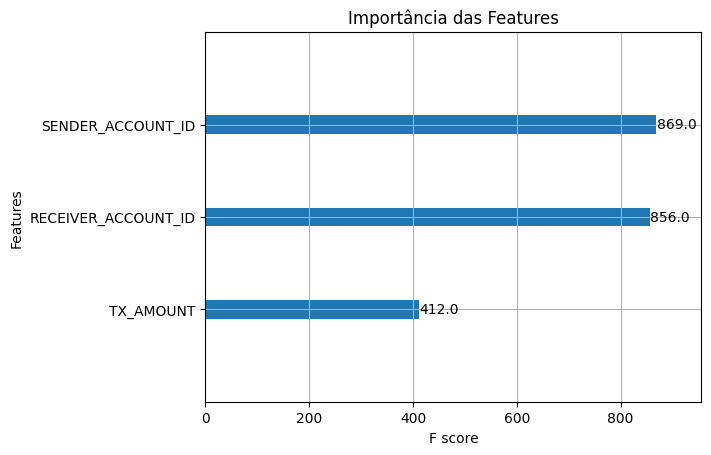

In [20]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance



# Passo 1: Carregar o dataset
# Caminho para o arquivo CSV
file_path = "./data/1k/transactions.csv"
df = pd.read_csv(file_path)

# Visualizar os primeiros registros para validação (opcional)
print(df.head())

# Passo 2: Definir as colunas de features (X) e o target (y)
# IS_FRAUD será nosso alvo (target), enquanto as outras colunas serão usadas como features
y = df["IS_FRAUD"]  # Rótulo

# Selecionar as features relevantes
features = ["TX_TYPE", "TX_AMOUNT", "SENDER_ACCOUNT_ID", "RECEIVER_ACCOUNT_ID"]
X = df[features]

# Passo 3: Pré-processar os dados

# Codificar a coluna TX_TYPE como números inteiros (exemplo: Transferência = 0, Depósito = 1)
encoder = LabelEncoder()
X["TX_TYPE"] = encoder.fit_transform(X["TX_TYPE"])

# Normalizar a coluna TX_AMOUNT para ajustar a escala
scaler = StandardScaler()
X["TX_AMOUNT"] = scaler.fit_transform(X[["TX_AMOUNT"]])

# Codificar SENDER_ACCOUNT_ID e RECEIVER_ACCOUNT_ID (opcional, se forem relevantes)
X["SENDER_ACCOUNT_ID"] = encoder.fit_transform(X["SENDER_ACCOUNT_ID"])
X["RECEIVER_ACCOUNT_ID"] = encoder.fit_transform(X["RECEIVER_ACCOUNT_ID"])

# Passo 4: Dividir os dados em treino e teste
# Aqui dividimos os dados em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 5: Treinar o modelo XGBoost
# Configuração inicial do modelo com parâmetros básicos
model = XGBClassifier(
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Balanceamento de classes
    max_depth=6,  # Profundidade máxima da árvore
    learning_rate=0.1,  # Taxa de aprendizado
    n_estimators=100,  # Número de árvores
    subsample=0.8,  # Porcentagem de amostras para cada árvore
    colsample_bytree=0.8,  # Porcentagem de features usadas por árvore
    random_state=42
)

# Ajustar o modelo aos dados de treino
model.fit(X_train, y_train)

# Passo 6: Avaliar o modelo
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de métricas de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Passo 7: Visualizar a importância das features
# As features mais importantes para o modelo XGBoost
plot_importance(model)
plt.title("Importância das Features")
plt.show()
